# Solutions: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../Data/Alarm Survey Data.xlsx')
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [3]:
df.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [4]:
# change the alarm rating column to a numeric column
df.alarm_rating = pd.to_numeric(df.alarm_rating.str.replace(' stars', ''))
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,light,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [5]:
# number of children and sleep quality don't need to be floats - this will be addressed below

## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [6]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [7]:
# see the rows with missing data
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [8]:
# look at the sleep quality values
df.sleep_quality.value_counts(dropna=False)

5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: sleep_quality, dtype: int64

In [9]:
# update sleep quality NaNs to 1
df.sleep_quality.fillna(2, inplace=True)

In [10]:
# sleep quality values
df.sleep_quality.value_counts(dropna=False)

5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: sleep_quality, dtype: int64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [11]:
# check the numerical columns
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.110835,1.145811,2.955075
std,1856.007409,7.472048,1.432192,0.963415,1.599481,1.101363
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000,5.000000


In [12]:
# look into number of children -- it just means 5+ kids, leave as is
df.number_of_children.value_counts()

0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: number_of_children, dtype: int64

In [13]:
# check the categorical columms
df.activity_level.value_counts()

active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: activity_level, dtype: int64

In [14]:
# map the lightly active values to one value
import numpy as np

df.activity_level = np.where(df.activity_level.isin(['light_activity', 'light']),
                             'lightly active',
                             df.activity_level)
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [15]:
# check the categorical columms
df.activity_level.value_counts()

lightly active    3314
active            2450
very active        669
Name: activity_level, dtype: int64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [16]:
# check for duplicate values
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3
6367,6301,27,2.0,lightly active,4.0,0,2
6368,6302,41,3.0,lightly active,5.0,0,2
6369,6303,25,0.0,lightly active,5.0,0,5
6370,6304,25,1.0,lightly active,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [17]:
# drop duplicates
df.drop_duplicates()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


In [18]:
# alternative: save non-duplicates
df = df[~df.duplicated()]
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

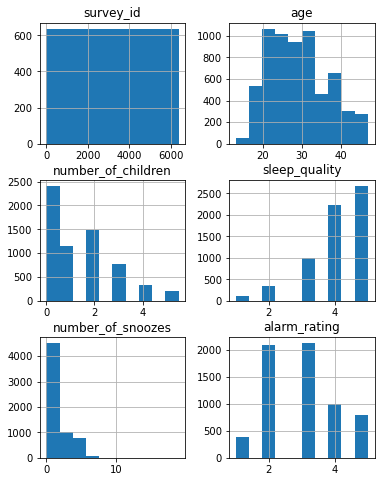

In [19]:
# look at the histograms of all numeric columns
df.hist(figsize = (6,8));

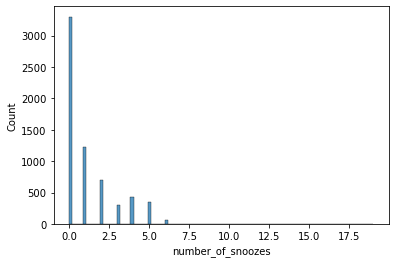

In [20]:
# look at the histogram of the number of snoozes
import seaborn as sns

sns.histplot(df.number_of_snoozes);

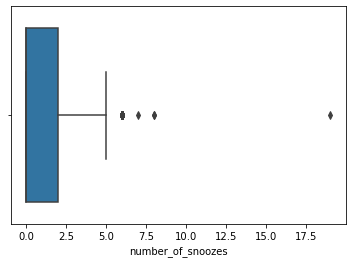

In [21]:
# look at the boxplot of the number of snoozes
sns.boxplot(x=df.number_of_snoozes);

In [22]:
# look into number of snoozes
df.number_of_snoozes.value_counts()

0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: number_of_snoozes, dtype: int64

In [23]:
# let's only remove the extreme outlier
df = df[df.number_of_snoozes < 19]
df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6361,6362,27,2.0,active,5.0,0,5
6362,6363,31,1.0,lightly active,4.0,0,4
6363,6364,26,0.0,lightly active,5.0,0,3
6364,6365,27,1.0,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [24]:
# check for missing values
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [25]:
# check for inconsistent text
df.activity_level.value_counts()

lightly active    3287
active            2422
very active        656
Name: activity_level, dtype: int64

In [26]:
# check for duplicate values
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [27]:
# check for outliers
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,3183.882325,29.076826,1.396936,4.107620,1.155067,2.955224
std,1837.741432,7.476376,1.433575,0.963612,1.587979,1.100414
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1593.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3184.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4775.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,8.000000,5.000000


In [28]:
# first round of data cleaning is complete!
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [29]:
import pandas as pd

# read in data
pens = pd.read_excel('../Data/Pen Sales Data.xlsx')
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [30]:
# check the data types
pens.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [31]:
# create a new column using addition
pens['Total Spend'] = pens['Pen Cost'] + pens['Shipping Cost']
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [32]:
import numpy as np

# create a new column using conditional logic
pens['Free Shipping'] = np.where(pens['Shipping Cost'] == 0, 'Yes', 'No')
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [33]:
# apply a datetime calculation
pens['Delivery Time'] = pens['Delivery Date'] - pens['Purchase Date']
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [34]:
# see the output of a datetime calculation
pens['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [35]:
# split a column into multiple columns
reviews = pens.Review.str.split('|')
reviews.head()

0    [DoodleWithMe, I love the way this pen writes,...
1    [ScribbleMaster, The classic Sharpie marker ha...
2    [PenPalForever, The retractable ballpoint pen ...
3    [TheWriteWay, This gel pen has a comfortable g...
4    [PenAndPaperPerson, The rollerball pen has a s...
Name: Review, dtype: object

In [36]:
# put columns back into original dataframe
pens[['User Name', 'Review Text']] = pd.DataFrame(reviews.to_list())
pens

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,No,3 days,SmoothOperatorPen,"This gel pen writes smoothly with a bold, vibr..."
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,No,2 days,InkStainedFingers,This pen is prone to leaking and can create a ...
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,No,6 days,BoldInkWriter,"Unfortunately, this pen has a tendency to spil..."
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,No,5 days,PenmanshipPro,The gel pen has a comfortable grip and writes ...
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,No,1 days,GelPenGuru,This retractable gel pen has a fine point that...


In [37]:
# find if a field contains particular words
pens['Leak or Spill'] = pens.Review.str.contains('leak|spill', regex=True)
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
